# 8-2. Boston 주택 가격 예측 모델

In [16]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

## 데이터 로드 및 전처리

In [90]:
from keras.datasets import boston_housing
# keras.datasets 안에 boston_housing 데이터셋을 로드

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

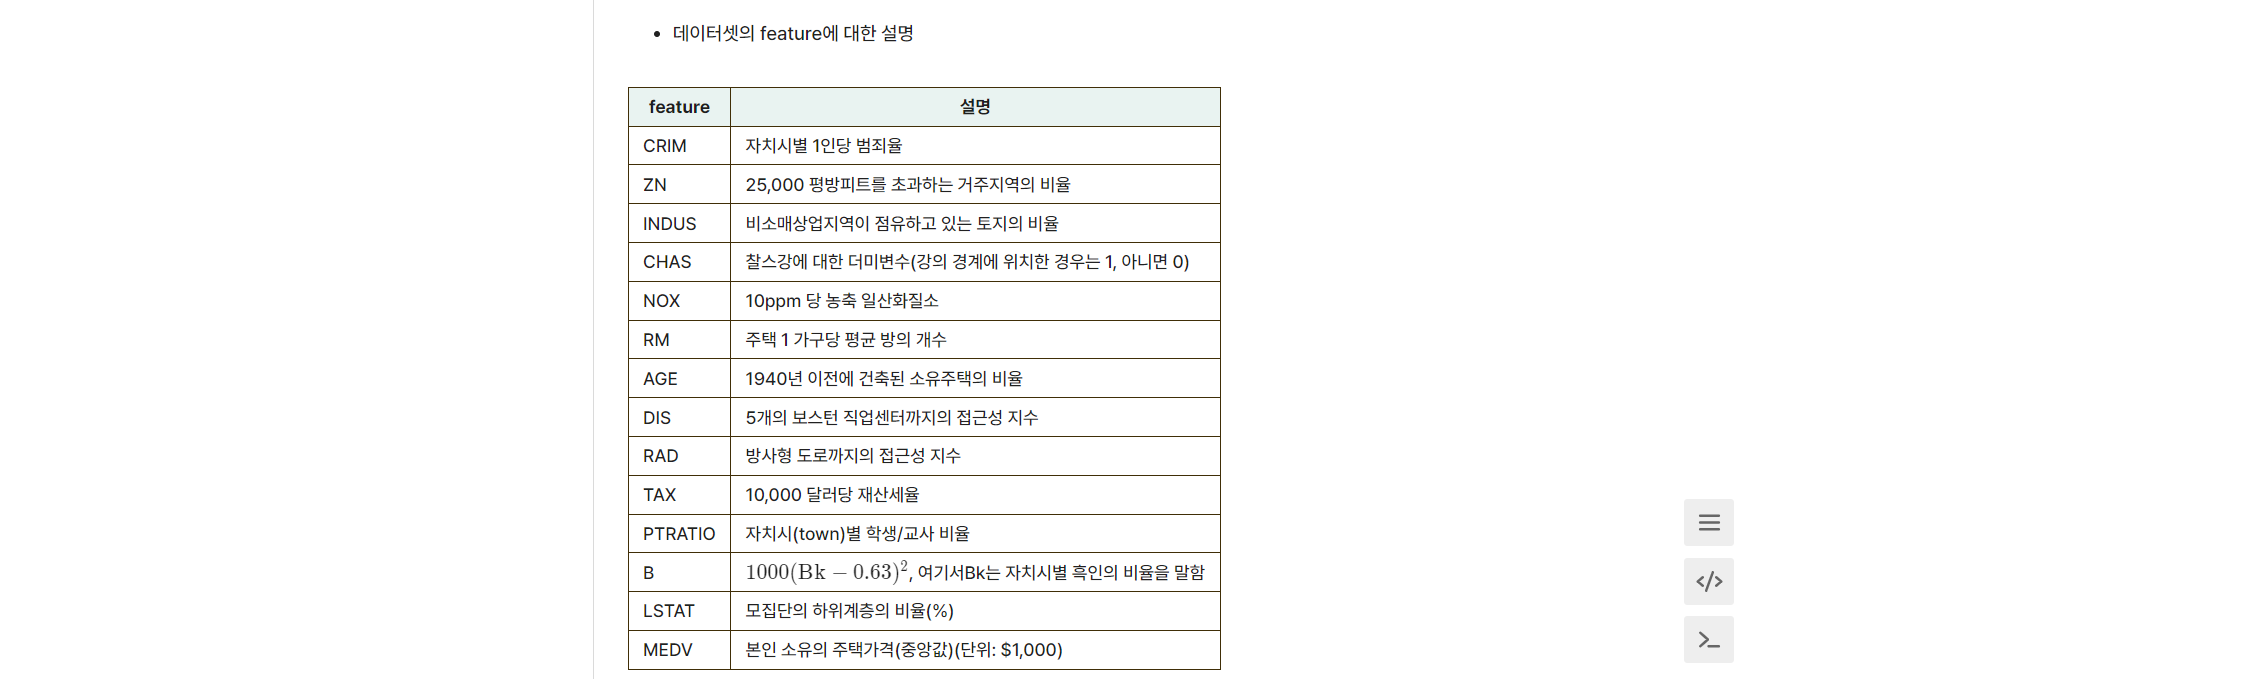

In [91]:
#feature 14개?

In [92]:
print(len(train_data))
print(len(test_data))
# 데이터셋의 크기를 확인 404개의 훈련샘플, 102개의 테스트 샘플

404
102


In [93]:
train_data
# 데이터셋 찍어보기

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [94]:
test_data
# 데이터셋 찍어보기

array([[1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.72500e+01, 2.90500e+01],
       [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94950e+02, 1.62100e+01],
       [5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.96900e+02, 9.74000e+00],
       ...,
       [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.89610e+02, 1.92000e+00],
       [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.91700e+02, 9.71000e+00],
       [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.40160e+02, 9.81000e+00]])

In [95]:
train_labels
# 데이터셋 찍어보기

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [96]:
test_labels
# 데이터셋 찍어보기

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

#### 데이터 shape 확인하기

In [97]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

#train_data 404행 13열
#train_labels 404개의 실수
#test_data 102행 13열
#test_labels 102개의 실수

(404, 13)
(404,)
(102, 13)
(102,)


#### 컬럼별 데이터 확인, 레이블 데이터 확인

In [98]:
display(train_data[0])

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [99]:
display(train_labels[0:10])

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

### 데이터셋의 전처리를 위해 표준화 작업을 수행

#### Q1-1 데이터셋의 전처리를 위해 표준화 작업을 수행 

In [100]:
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis = 0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
std = train_data.std(axis = 0)
train_data /= std


# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

### 모델 구성 및 컴파일

#### 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

#### Q1-2 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일을 합니다.

In [101]:
# def build_model(input_shape=(0,)):
    
#input_shape은 (train_data.shape[1], )으로 구성합니다.
input_shape = train_data.shape[1],
    
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = input_shape)) #레이어 갯수 64개는 어떻게 설정하는것인가?, 여기에만 input_shape넣는 이유?
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1)) #레이어 갯수 1개는 어떻게 설정하는것인가?
    
# 회귀(예측)을 위한 모델은 loss와 metrics를 mse로 사용합니다.

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
#     return model

    
    
#코드 참고 https://codingcrews.github.io/2019/01/15/boston_linear_regression/

input size는 입력 데이터의 변수의 개수(혹은 피쳐라고 부르기도 합니다)와 같은 의미입니다.\
그런데 모든 변수가 노드로 설정된다는 표현보다는 각 입력 변수가 입력 레이어의 각 노드에 매칭되어 들어간다고 보시면 좋을 것 같습니다 \
(엄밀히 따지면 가중치와 입력 데이터의 행렬곱이지만요^^;;;)

### 모델 학습

#### epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

#### Q1-3 예측을 위한 딥러닝 모델을 학습합니다.

In [115]:
history = model.fit(
    train_data,
    train_labels,
    epochs = 150,
    batch_size = 16,
    validation_split = 0.2)


Epoch 1/150
21/21 [==============================] - 0s 4ms/step - loss: 1.3623 - mae: 0.8386 - val_loss: 0.8213 - val_mae: 0.6867
Epoch 2/150
21/21 [==============================] - 0s 3ms/step - loss: 1.4539 - mae: 0.8888 - val_loss: 0.9326 - val_mae: 0.7319
Epoch 3/150
21/21 [==============================] - 0s 3ms/step - loss: 1.3943 - mae: 0.8536 - val_loss: 1.0578 - val_mae: 0.7411
Epoch 4/150
21/21 [==============================] - 0s 3ms/step - loss: 1.4333 - mae: 0.8552 - val_loss: 0.9302 - val_mae: 0.6916
Epoch 5/150
21/21 [==============================] - 0s 3ms/step - loss: 1.3308 - mae: 0.8291 - val_loss: 0.9763 - val_mae: 0.7368
Epoch 6/150
21/21 [==============================] - 0s 3ms/step - loss: 1.6167 - mae: 0.9098 - val_loss: 1.0552 - val_mae: 0.7573
Epoch 7/150
21/21 [==============================] - 0s 3ms/step - loss: 1.3406 - mae: 0.8327 - val_loss: 1.1150 - val_mae: 0.7761
Epoch 8/150
21/21 [==============================] - 0s 3ms/step - loss: 1.3113 - m

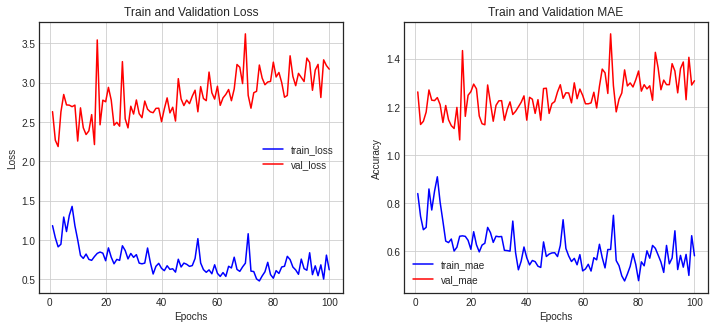

In [121]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mse = history_dict['mae']
val_mse = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mse, 'b-', label='train_mae')
ax2.plot(epochs, val_mse, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [122]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 14.6004 - mae: 2.5477


[14.600379943847656, 2.547741174697876]

In [123]:
history = model.fit(
    train_data,
    train_labels,
    epochs = 100,
    batch_size = 8,
    validation_split = 0.2)

Epoch 1/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5932 - mae: 0.5455 - val_loss: 3.0139 - val_mae: 1.2919
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.4895 - mae: 0.4922 - val_loss: 3.1247 - val_mae: 1.3097
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 0.4725 - mae: 0.4776 - val_loss: 2.9779 - val_mae: 1.2999
Epoch 4/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5207 - mae: 0.5085 - val_loss: 3.1549 - val_mae: 1.2989
Epoch 5/100
41/41 [==============================] - 0s 2ms/step - loss: 0.4788 - mae: 0.4860 - val_loss: 3.3606 - val_mae: 1.3461
Epoch 6/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5391 - mae: 0.5271 - val_loss: 3.4277 - val_mae: 1.3787
Epoch 7/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5872 - mae: 0.5413 - val_loss: 3.1741 - val_mae: 1.3204
Epoch 8/100
41/41 [==============================] - 0s 2ms/step - loss: 0.4448 - m

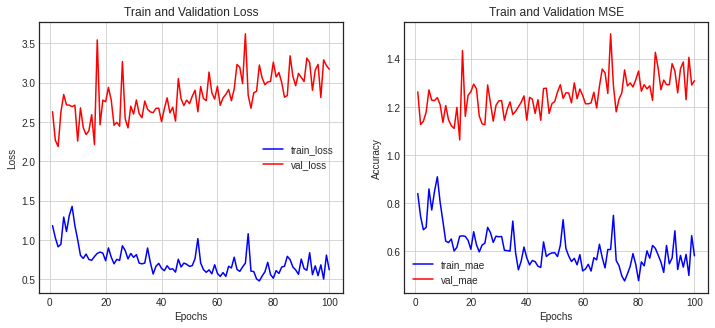

In [119]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mse = history_dict['mae']
val_mse = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mse, 'b-', label='train_mae')
ax2.plot(epochs, val_mse, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [124]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 14.0297 - mae: 2.5130


[14.029747009277344, 2.5129714012145996]

In [72]:
#

# k = 4
# num_val_samples = len(train_data) // k
# num_epochs = 150
# all_scores = []
# for i in range(k):
#     print(f"#{i}번째 폴드 처리중")
#     val_data = train_data[i*num_val_samples: (i + 1) * num_val_samples]
#     val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
#     partial_train_data = np.concatenate(
#         [train_data[:i * num_val_samples],
#          train_data[(i+1) * num_val_samples:]],
#         axis = 0)
#     model = build_model()
#     model.fit(partial_train_data, partial_train_targets,
#              epochs=num_epochs, batch_size=16, verbose = 0)
#     val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
#     all_scores.append(val_mae)
    


#0번째 폴드 처리중


NameError: name 'partial_train_targets' is not defined

NameError: name 'partial_train_targets' is not defined

# 8-3. Reuters 딥러닝 모델

## 데이터 로드 및 전처리

reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. \
데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, \
이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).\
데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.\
훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [17]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

#### Q2-1 reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

In [180]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [181]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [182]:
train_data, val_data = train_test_split(train_data, test_size = 0.25, random_state = 300)

In [183]:
print(len(train_data))
print(len(test_data))
print(len(val_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [184]:
train_labels, val_labels = train_test_split(train_labels, test_size = 0.25, random_state = 300)

In [185]:
print(len(train_data))
print(len(test_data))
print(len(val_data))
print(len(train_labels))

6736
2246
2246
6736


검증데이터셋 분리

#### Q2-2 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.

In [186]:
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, data in enumerate(data):
        results[i, data] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)

In [187]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [188]:
x_val

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [189]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [190]:
train_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [191]:
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

원핫인코딩이 모두 잘 된것 같다.

In [192]:
print(len(x_train))
print(len(x_val))
print(len(x_test))
print(len(train_labels))
print(len(test_labels))

6736
2246
2246
6736
2246


## 모델 구성 및 컴파일

* BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

#### Q2-3 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.

배치 정규화는 모델에 입력되는 샘플들을 균일하게 만드는 방법으로 가중치의 활성화값이 적당히 퍼지게끔 '강제'로 적용시키는 것을 의미합니다.\
\
보통 미니배치 단위로 데이터의 평균이 0, 표준편차는 1로 정규화를 수행하여 학습 자체가 빨리 진행될 수 있도록 만들어주고, \
학습 후에도 새로운 데이터에 일반화가 잘 될 수 있도록 도와줍니다. \
또한, 초기값에 크게 의존하지 않아도 되고, 과대적합을 방지하는 역할을 수행합니다.
\
\
배치 정규화는 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 레이어에 들어갔다는 보장이 없으므로 주로 Dense 레이어 이후, \
활성화 함수 이전에 활용됩니다.

In [193]:
model = models.Sequential()
model.add(layers.Dense(64, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(64, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))
# 마지막 Dense층의 크기가 46, 각 입력 샘플에 대해 46차원의 벡터를 출력한다는 뜻.
#이 벡터의 각 원소(각 차원)는 각기 다른 출력 클래스가 인코딩된 것. 케창딥 p 163.

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 64)                640064    
_________________________________________________________________
batch_normalization_38 (Batc (None, 64)                256       
_________________________________________________________________
activation_38 (Activation)   (None, 64)                0         
_________________________________________________________________
hidden (Dense)               (None, 64)                4160      
_________________________________________________________________
batch_normalization_39 (Batc (None, 64)                256       
_________________________________________________________________
activation_39 (Activation)   (None, 64)                0         
_________________________________________________________________
output (Dense)               (None, 46)              

## 모델 학습

* ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

#### Q2-4 ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [194]:
model.save('reuters_model.h5')

모델을 학습시키고 저장을 안하면 처음부터 다시 학습을 해야하기 때문에 어느정도 학습이 진행된 경우 추후 모델사용을 위해 저장해준다.\
모델을 저장할 때는 save()함수를 사용하여 저장하고, 모델을 불러올 때는 load_model()함수를 사용하여 불러온다.\
Sequencial API 또는 Functional API를 사용한 경우 모델의 저장 및 로드가 가능하지만, Subclassing API방식은 사용할 수가 없다.\
Subclassing API방식은 save_weights()와 load_weights()를 이용해 모델의 파라미터만 저장 및 로드하는 것이 가능하다.

In [195]:
loaded_model = models.load_model('reuters_model.h5')
loaded_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 64)                640064    
_________________________________________________________________
batch_normalization_38 (Batc (None, 64)                256       
_________________________________________________________________
activation_38 (Activation)   (None, 64)                0         
_________________________________________________________________
hidden (Dense)               (None, 64)                4160      
_________________________________________________________________
batch_normalization_39 (Batc (None, 64)                256       
_________________________________________________________________
activation_39 (Activation)   (None, 64)                0         
_________________________________________________________________
output (Dense)               (None, 46)              

#### ModelCheckpoint

tf.keras.callbacks.ModelCheckpoint: 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용합니다.

In [196]:
check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5')
history = model.fit(x_train, train_labels, epochs=50,
                    callbacks=[check_point_cb])

Epoch 1/50
211/211 [==============================] - 2s 4ms/step - loss: 1.4303 - accuracy: 0.6879
Epoch 2/50
211/211 [==============================] - 1s 4ms/step - loss: 0.6854 - accuracy: 0.8391
Epoch 3/50
211/211 [==============================] - 1s 4ms/step - loss: 0.4058 - accuracy: 0.9050
Epoch 4/50
211/211 [==============================] - 1s 4ms/step - loss: 0.2710 - accuracy: 0.9397
Epoch 5/50
211/211 [==============================] - 1s 4ms/step - loss: 0.2005 - accuracy: 0.9535
Epoch 6/50
211/211 [==============================] - 1s 4ms/step - loss: 0.1826 - accuracy: 0.9567
Epoch 7/50
211/211 [==============================] - 1s 4ms/step - loss: 0.1645 - accuracy: 0.9577
Epoch 8/50
211/211 [==============================] - 1s 4ms/step - loss: 0.1395 - accuracy: 0.9608
Epoch 9/50
211/211 [==============================] - 1s 4ms/step - loss: 0.1450 - accuracy: 0.9598
Epoch 10/50
211/211 [==============================] - 1s 4ms/step - loss: 0.1323 - accuracy: 0.9604

최상의 모델만을 저장하는 옵션으로 save_best_only=True를 지정합니다.

In [197]:
check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5', save_best_only=True)
history = model.fit(x_train, train_labels, epochs=50,
                    validation_data=(x_val, val_labels),
                    callbacks=[check_point_cb])

Epoch 1/50
211/211 [==============================] - 1s 7ms/step - loss: 0.0811 - accuracy: 0.9641 - val_loss: 2.0531 - val_accuracy: 0.7760
Epoch 2/50
211/211 [==============================] - 1s 5ms/step - loss: 0.0774 - accuracy: 0.9653 - val_loss: 2.1757 - val_accuracy: 0.7703
Epoch 3/50
211/211 [==============================] - 1s 5ms/step - loss: 0.0782 - accuracy: 0.9653 - val_loss: 2.0427 - val_accuracy: 0.7760
Epoch 4/50
211/211 [==============================] - 1s 5ms/step - loss: 0.0812 - accuracy: 0.9656 - val_loss: 2.1900 - val_accuracy: 0.7769
Epoch 5/50
211/211 [==============================] - 1s 5ms/step - loss: 0.0795 - accuracy: 0.9633 - val_loss: 2.0531 - val_accuracy: 0.7680
Epoch 6/50
211/211 [==============================] - 1s 5ms/step - loss: 0.0780 - accuracy: 0.9630 - val_loss: 2.1468 - val_accuracy: 0.7760
Epoch 7/50
211/211 [==============================] - 1s 5ms/step - loss: 0.0790 - accuracy: 0.9657 - val_loss: 2.1636 - val_accuracy: 0.7863
Epoch 

In [198]:
tf.shape(x_val)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 2246, 10000], dtype=int32)>

In [199]:
tf.shape(x_test)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 2246, 10000], dtype=int32)>

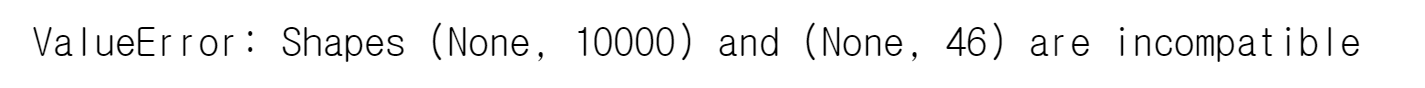

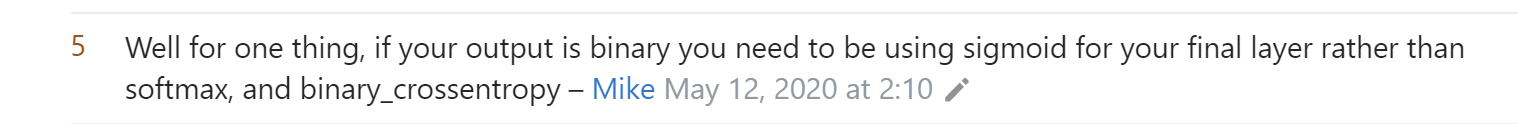

위 오류를 해결하기 위해 softmax함수를 sigmoid함수로 바꾸었다.
model.add(layers.Dense(46, activation='sigmoid', name='output')) 

같은문제 발생..

val_labels를 원핫인코딩 하지 않은 것이 문제의 원인이었다..

#### EarlyStopping

tf.keras.callbacks.EarlyStopping: 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용

일정 patience 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈추게 됩니다. \
모델이 향상되지 않으면 학습이 자동으로 중지되므로, epochs 숫자를 크게 해도 무방합니다. \
학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요가 없습니다.

In [201]:
check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, train_labels, epochs=50,
                    validation_data=(x_val, val_labels),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/50
211/211 [==============================] - 1s 6ms/step - loss: 0.0695 - accuracy: 0.9651 - val_loss: 2.5790 - val_accuracy: 0.7654
Epoch 2/50
211/211 [==============================] - 1s 5ms/step - loss: 0.0693 - accuracy: 0.9663 - val_loss: 2.5234 - val_accuracy: 0.7640
Epoch 3/50
211/211 [==============================] - 1s 5ms/step - loss: 0.0665 - accuracy: 0.9678 - val_loss: 2.4485 - val_accuracy: 0.7707
Epoch 4/50
211/211 [==============================] - 1s 5ms/step - loss: 0.0660 - accuracy: 0.9684 - val_loss: 2.5542 - val_accuracy: 0.7703
Epoch 5/50
211/211 [==============================] - 1s 5ms/step - loss: 0.0675 - accuracy: 0.9667 - val_loss: 2.5149 - val_accuracy: 0.7676
Epoch 6/50
211/211 [==============================] - 1s 5ms/step - loss: 0.0717 - accuracy: 0.9648 - val_loss: 2.6170 - val_accuracy: 0.7765


* 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

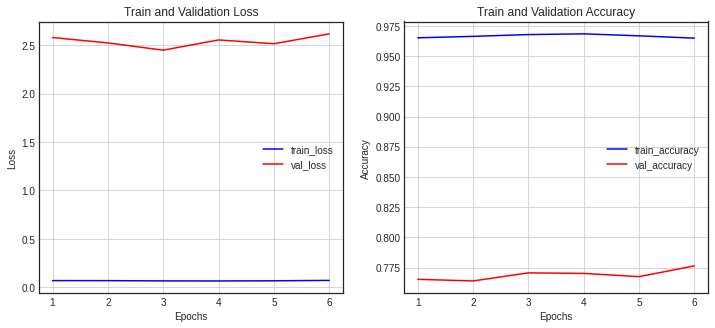

In [202]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

* 테스트 데이터셋을 이용해 모델을 평가합니다.

#### Q2-5 테스트 데이터셋을 이용해 모델을 평가합니다.

In [203]:
model.evaluate(x_test, test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 2.6388 - accuracy: 0.7694


[2.6388015747070312, 0.7693677544593811]

# 8-4. CIFAR10 딥러닝 모델

CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있습니다. \
데이터셋의 각 이미지는 10개의 클래스로 라벨링 되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있습니다.

## 데이터 로드 및 전처리

* CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 
* 데이터셋은 keras.datasets에서 불러올 수 있는 *CIFAR10 데이터 셋을 활용합니다.
* 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
* 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

#### Q3-1 cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

In [19]:
(x_train_full, y_train_full), (x_test, y_test)  = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = 0.2, random_state = 300)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


* class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [20]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

* 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

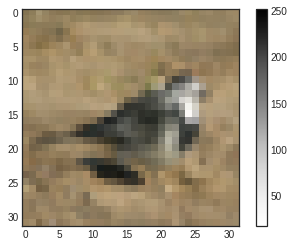

In [21]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [22]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


* 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

#### Q3-2 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.

In [23]:
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)


print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [24]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일

* BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

#### Q3-3 BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [25]:
model = models.Sequential()
model.add(layers.Input(shape=(3072)))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,580,554
Trainable params: 1,579,530
Non-trainable params: 1,024
_________________________________________________________________


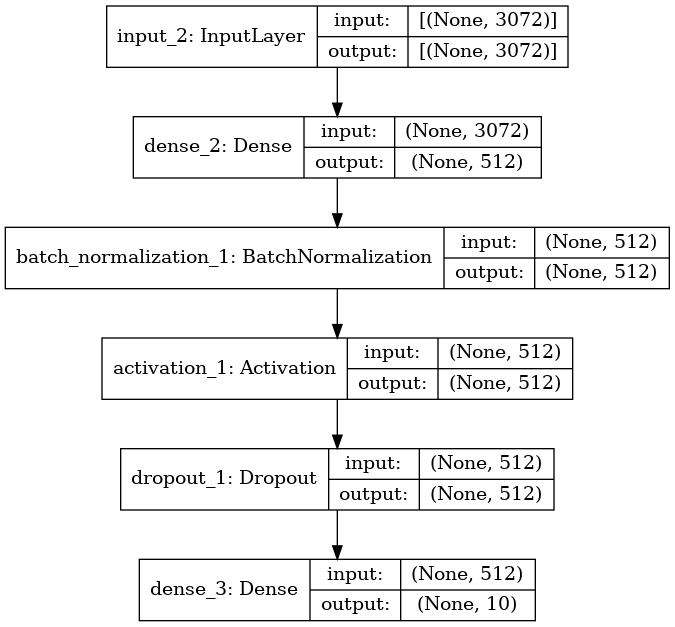

In [27]:
utils.plot_model(model, show_shapes=True)

## 모델 학습

* ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

#### Q3-4 ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [28]:
model.save('cifar10_model.h5')

In [29]:
loaded_model = models.load_model('cifar10_model.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,580,554
Trainable params: 1,579,530
Non-trainable params: 1,024
_________________________________________________________________


In [30]:
check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5')
history = model.fit(x_train, y_train, epochs=50,
                    callbacks=[check_point_cb])

Epoch 1/50
1250/1250 [==============================] - 5s 3ms/step - loss: 1.9003 - accuracy: 0.1005
Epoch 2/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6761 - accuracy: 0.0982
Epoch 3/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6047 - accuracy: 0.0969
Epoch 4/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5638 - accuracy: 0.0956
Epoch 5/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5226 - accuracy: 0.0938
Epoch 6/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.4960 - accuracy: 0.0956
Epoch 7/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4675 - accuracy: 0.0952
Epoch 8/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4458 - accuracy: 0.0960
Epoch 9/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4237 - accuracy: 0.0959
Epoch 10/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.400

In [31]:
print(tf.shape(x_train))
print(tf.shape(y_train))

tf.Tensor([40000  3072], shape=(2,), dtype=int32)
tf.Tensor([40000     1], shape=(2,), dtype=int32)


In [32]:
check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5', save_best_only=True)
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9865 - accuracy: 0.0968 - val_loss: 1.6030 - val_accuracy: 0.1053
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9788 - accuracy: 0.0978 - val_loss: 1.5500 - val_accuracy: 0.0878
Epoch 3/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9880 - accuracy: 0.0988 - val_loss: 1.5101 - val_accuracy: 0.0476
Epoch 4/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9732 - accuracy: 0.0985 - val_loss: 1.6044 - val_accuracy: 0.1799
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9707 - accuracy: 0.0987 - val_loss: 1.4644 - val_accuracy: 0.1168
Epoch 6/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9616 - accuracy: 0.0988 - val_loss: 1.5713 - val_accuracy: 0.1463
Epoch 7/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9499 - accuracy: 0.0975 - val_loss: 1.5591 - val_accuracy:

In [36]:
print(tf.shape(x_val))
print(tf.shape(y_val))

tf.Tensor([10000  3072], shape=(2,), dtype=int32)
tf.Tensor([10000     1], shape=(2,), dtype=int32)


* 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

#### Q3-5 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

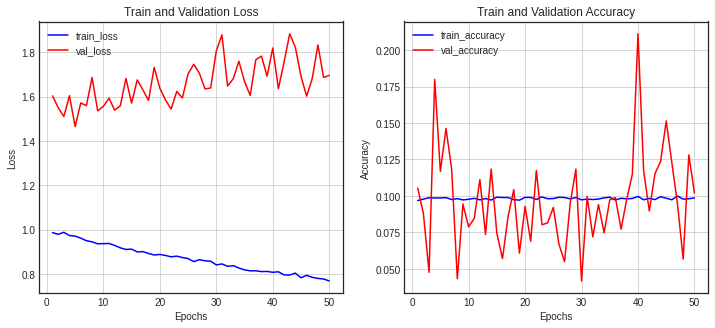

In [34]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

* 테스트 데이터셋을 이용해 모델을 평가합니다.

In [35]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7040 - accuracy: 0.1016


[1.7040057182312012, 0.10159999877214432]

프로젝트 회고

딥러닝에 대한 개념을 복습하면서, 각 프로젝트에 맞는 딥러닝 모델을 구축해볼 수 있었다.
주택가격, 로이터, CIFAR 10 프로젝트를 진행하며 각각에 맞는 코드를 구현해볼 수 있었다.
파라미터들을 변경하며 좀 더 나은 수치를 뽑아 내고자 하였으나 구현 시간이 꽤나 걸리는 바람에 다양하게 그래프를 그려보는것은 포기ㅠㅠ
